# ЛР №5

# Решение систем нелинейных уравнений

In [8]:
from scipy.optimize import fsolve
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import sympy as sp
import numpy as np
import math

### 1 
Отделить корни заданного уравнения графически


Заданное уравнение

In [9]:
f = lambda x: np.cos(x) - np.sqrt(x + 2) + 1
df = lambda x: -1 * math.sin(x) - 0.5 * math.pow(x + 2, -0.5)

Отделяем корни

In [10]:
%matplotlib inline

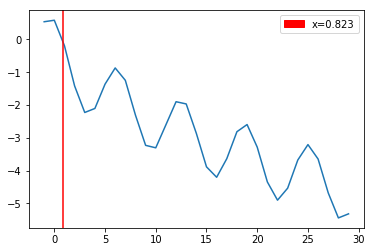

In [11]:
roots = fsolve(f, 2)
x = np.array(range(-1, 30))
y = f(x)
plt.plot(x, y)
plt.axvline(x=roots, color='r', linestyle='-')
red_patch = mpatches.Patch(color='red', label=f'x={roots[0]:.3f}')
plt.legend(handles=[red_patch])
plt.show()

### 2
Решить уравнения методом хорд

In [80]:
x0 = 0
x1 = 1
if f(x0) * f(x1) < 0:
    while abs(x1 - x0) > 1e-5:
        x = x0 - f(x0) * (x1 - x0) / (f(x1) - f(x0))
        x0, x1 = x1, x
    print(f"\nКорень уравнения: {x:.3}")


Корень уравнения: 0.823


### 3
Решить уравнение методом касательных

In [81]:
x0 = 100 
x1 = x0 - f(x0) / df(x0)
while abs(x1 - x0) > 1e-5: 
    x = x1 - f(x1) / df(x1)
    x0, x1 = x1, x
print(f"\nКорень уравнения: {x:.3}")


Корень уравнения: 0.823


### 4
Отделить корни заданной системы нелинейных уравнений графически

In [14]:
sys_f1 = lambda x, y: sp.tan(x * y) - x**2
sys_f2 = lambda x, y: 0.7 * x**2 + 2 * y**2 - 1

Отделяем корни

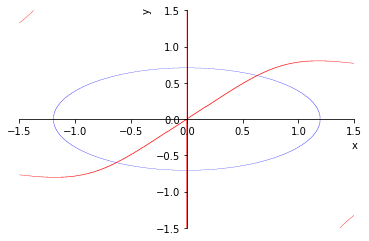

In [15]:
x, y = sp.symbols('x y')
p0 = sp.plot_implicit(sys_f2(x, y), (x, -1.5, 1.5), (y, -1.5, 1.5), show=False, line_color='b')
p1 = sp.plot_implicit(sys_f1(x, y), (x, -1.5, 1.5), (y, -1.5, 1.5), show=False, line_color='r')
p0.extend(p1)
p0.show()

### 5
Решить систему методом простых итераций

In [61]:
F = lambda xy: [np.tan(xy[0] * xy[1]) - xy[0]**2, 0.7 * xy[0]**2 + 2 * xy[1]**2 - 1]
fi = lambda xy: [math.sqrt(math.tan(xy[0] * xy[1])), math.sqrt((1 - 0.7 * xy[0]**2) / 2)]
minus_fi = lambda xy: [-math.sqrt(math.tan(xy[0] * xy[1])), -math.sqrt((1 - 0.7 * xy[0]**2) / 2)]
def J(xy):
    res = [[0.0, 0.0], [0.0, 0.0]]
    res[0][0] = -2 * xy[0] + xy[1] * (np.tan(xy[0]*xy[1])**2 + 1)
    res[0][1] = xy[0] * (np.tan(xy[0]*xy[1])**2 + 1)
    res[1][0] = 1.4 * xy[0]
    res[1][1] = 4 * xy[1]
    return np.array(res)

In [53]:
def iterr(x0, itrr_func):
    x1 = itrr_func(x0)
    while abs(x1[0] - x0[0]) > 1e-5 or abs(x1[1] - x0[1]) > 1e-5:
        x = itrr_func(x1)
        x0, x1 = x1, x
    print("Корень системы:", ", ".join(map(str, x)))

In [54]:
iterr([0.83, 1], fi)
iterr([0, 0.8], fi)
iterr([-0.83, -0.7], minus_fi)
iterr([0, -0.8], minus_fi)

Корень системы: 0.6310229619451228, 0.6005262403306086
Корень системы: 0.0, 0.7071067811865476
Корень системы: -0.6310288456446511, -0.6005230551716196
Корень системы: 0.0, -0.7071067811865476


### 6
Решить систему методом Ньютона

In [55]:
def newton(x0):
    i = 0
    x1 = [k - m for (k, m) in zip(x0, np.linalg.inv(J(x0)) @ F(x0))]
    while abs(x1[0] - x0[0]) > 1e-5 or abs(x1[1] - x0[1]) > 1e-5:
        i += 1
        x = [k - m for k, m in zip(x1, np.linalg.inv(J(x1)) @ F(x1))]
        x0, x1 = x1, x
    print("Корень системы:", ", ".join(map(str, x)))
    print(f"Количество итераций: {i}\n")   

In [77]:
newton([0.8, 0.9])
newton([0, 0.5])
newton([-0.6, -0.6])
newton([-0, -0.9])

Корень системы: 0.6310253503923949, 0.6005268124953965
Количество итераций: 7

Корень системы: 0.0, 0.7071067811873449
Количество итераций: 3

Корень системы: -0.6310253503228611, -0.6005268125070298
Количество итераций: 2

Корень системы: 0.0, -0.7071067811865502
Количество итераций: 3



### 7
Решить систему модифицированным методом Ньютона. Сравнить скорости сходимости методов

In [75]:
def modified_newton(x0):
    i = 0
    J0 = np.linalg.inv(J(x0))
    x1 = [k - m for (k, m) in zip(x0, J0 @ F(x0))]
    while abs(x1[0] - x0[0]) > 1e-5 or abs(x1[1] - x0[1]) > 1e-5:
        i += 1
        x = [k - m for k, m in zip(x1, J0 @ F(x1))]
        x0, x1 = x1, x
    print("Корень системы:", ", ".join(map(str, x)))
    print(f"Количество итераций: {i}\n")

In [78]:
modified_newton([0.8, 0.9])
modified_newton([0, 0.5])
modified_newton([-0.6, -0.6])
modified_newton([0, -0.9])

Корень системы: 0.6310296933645543, 0.6005255939269765
Количество итераций: 94

Корень системы: 0.0, 0.7071039681017769
Количество итераций: 11

Корень системы: -0.6310254516477837, -0.6005267964046216
Количество итераций: 4

Корень системы: 0.0, -0.7071086513254751
Количество итераций: 6

